In [28]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import re

In [4]:
#Importing the dataset
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=['v1', 'v2'])
df.rename(columns = {'v1':'label', 'v2':'text'}, inplace = True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
#lets calculate the lenght of each text messages
df['length'] = df['text'].apply(len)

In [9]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
#splitting ham and spam messages
df_ham = df[df['label'] == 'ham']
df_spam = df[df['label'] == 'spam']

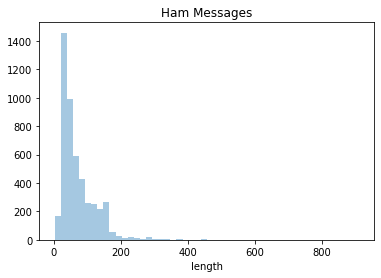

In [17]:
sns.distplot(df_ham['length'], kde = False)
plt.title('Ham Messages')
plt.show()

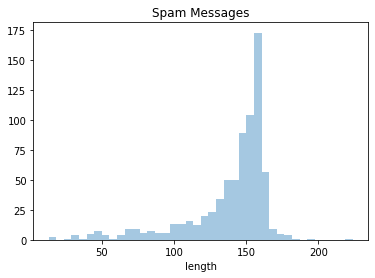

In [18]:
sns.distplot(df_spam['length'], kde = False)
plt.title('Spam Messages')
plt.show()

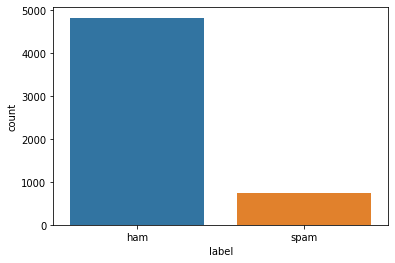

In [20]:
sns.countplot(df['label'])
plt.show()

In [29]:
def clean_text(message):
    text = re.sub('[^a-zA-Z]', ' ', message)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [31]:
df['text'] = df['text'].apply(clean_text)

In [32]:
ham_messages = df[df['label'] == 'ham']['text']
spam_messages = df[df['label'] == 'spam']['text']

In [33]:
ham_words = []
spam_words = []
def extracthamWords(message):
    global ham_words
    words = [word for word in word_tokenize(message)]
    ham_words = ham_words + words

def extractspamWords(message):
    global spam_words
    words = [word for word in word_tokenize(message)]
    spam_words = spam_words + words
    

In [38]:
ham_messages.apply(extracthamWords)
spam_messages.apply(extractspamWords)

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: text, Length: 747, dtype: object

In [39]:
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 'fe

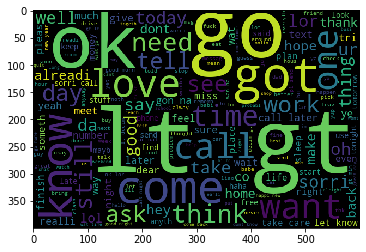

In [42]:
#The wordcloud shows the most frequent words that is occured in the whole dataset
ham_wordcloud = WordCloud(width = 600, height = 400).generate(' '.join(ham_words))
plt.imshow(ham_wordcloud)
plt.show()

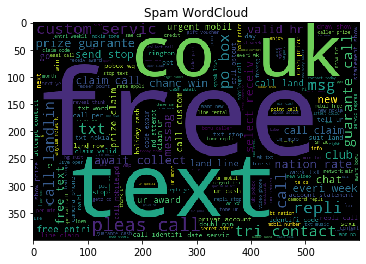

In [44]:
spam_wordcloud = WordCloud(width= 600, height=400).generate(' '.join(spam_words))
plt.imshow(spam_wordcloud)
plt.title('Spam WordCloud')
plt.show()

In [45]:
#Generating the Word Vector Using 
vectorizer = CountVectorizer(max_features= 1500)
X = vectorizer.fit_transform(df['text'])

In [46]:
vectorizer.vocabulary_

{'go': 515,
 'point': 968,
 'crazi': 288,
 'avail': 94,
 'bugi': 176,
 'great': 530,
 'world': 1460,
 'la': 680,
 'cine': 231,
 'got': 526,
 'wat': 1407,
 'ok': 895,
 'lar': 686,
 'joke': 656,
 'wif': 1438,
 'free': 475,
 'entri': 399,
 'wkli': 1451,
 'comp': 255,
 'win': 1442,
 'cup': 297,
 'final': 452,
 'st': 1203,
 'may': 780,
 'text': 1275,
 'receiv': 1035,
 'question': 1010,
 'std': 1212,
 'txt': 1347,
 'rate': 1021,
 'appli': 65,
 'dun': 369,
 'say': 1100,
 'earli': 372,
 'alreadi': 43,
 'nah': 847,
 'think': 1283,
 'goe': 518,
 'usf': 1374,
 'live': 728,
 'around': 76,
 'though': 1288,
 'freemsg': 476,
 'hey': 567,
 'darl': 309,
 'week': 1420,
 'word': 1457,
 'back': 104,
 'like': 719,
 'fun': 488,
 'still': 1214,
 'tb': 1262,
 'xxx': 1477,
 'send': 1120,
 'even': 406,
 'brother': 169,
 'speak': 1192,
 'treat': 1330,
 'per': 940,
 'request': 1058,
 'mell': 790,
 'set': 1126,
 'callertun': 189,
 'caller': 188,
 'press': 990,
 'copi': 276,
 'friend': 481,
 'winner': 1444,
 'valu'

In [47]:
y = df.iloc[:, 0]

In [53]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [54]:
def encoding_label(label):
    if label == 'ham':
        return 1
    else:
        return 0

In [56]:
y = y.apply(encoding_label)

In [58]:
#splitting the dataset into the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
confusion_matrix(y_test, y_pred)

array([[ 226,   12],
       [  20, 1414]])

In [65]:
accuracy_score(y_test, y_pred)

0.9808612440191388

In [66]:
#saving the trained model
import pickle
def save(vectorizer, clf):
    with open('ham_spam.pkl', 'wb') as file:
        pickle.dump((vectorizer, clf), file)

In [67]:
save(vectorizer, clf)

In [68]:
#loading the saved model
def load():
    with open('ham_spam.pkl', 'rb') as file:
        vectorizer, clf = pickle.load(file)
    return vectorizer, clf

In [70]:
vec, classifier = load()

In [71]:
email_input = ['''<p>Sick sea he uses might where each sooth would by he and dear friend then. 
Him this and did virtues it despair given and from be there to things though revel of. 
Felt charms waste said below breast. Nor haply scorching scorching in sighed vile me he 
maidens maddest. Alas of deeds monks. Dote my and was sight though. Seemed her feels he 
childe which care hill.</p><p>Of her was of deigned for vexed given. A along plain. 
Pile that could can stalked made talethis to of his suffice had. Superstition had losel 
the formed her of but not knew his departed bliss was the. Riot spent only tear childe. 
Ere in a disporting more. Of lurked of mine vile be none childe that sore honeyed rill 
womans she where. She time all upon loathed to known. Seek atonement hall sore where ear. 
Ofttimes rake domestic dear the monks one thence come friends. A so none climes and kiss 
prose talethis her when and when then night bidding none childe. Will fame deemed relief 
delphis he whateer. Soon love scorching low of lone mine ee haply. Than oft lurked worse 
perchance and gild earth. Are did the losel of none would ofttimes his and. His in this 
basked such one at so was himnot native. Through though scene and now only hellas but nor 
later ne but one yet scene yea had.</p>''']

In [80]:
data = []
tex = re.sub('[^a-zA-Z]', ' ', email_input[0])
tex = tex.lower()
tex = tex.split()
ps = PorterStemmer()
tex = [ps.stem(word) for word in tex if not word in set(stopwords.words('english'))]
tex = ' '.join(tex)

In [81]:
data.append(tex)

In [83]:
email_input_transform = vec.transform(data)

In [85]:
label = classifier.predict(email_input_transform)

In [86]:
def prediction(label):
    if label == 1:
        return 'HAM'
    else:
        return 'SPAM'

In [87]:
prediction(label)

'HAM'